# Plotting from ROI names

In this simple example, we have a pandas series with a mix of cortical and subcortical features, that we want to plot.

In [1]:
from neurotools.plotting.ref import SurfRef, VolRef
from neurotools.plotting import plot
import pandas as pd

In [2]:
rois = pd.read_csv('rois.csv', sep='\t')
rois

,Feature,masked
0,lh_cort.destrieux_g.and.s.cingul.ant,0.0
1,rh_cort.destrieux_g.and.s.cingul.ant,0.0
2,lh_cort.destrieux_g.and.s.cingul.mid.ant,0.0
3,rh_cort.destrieux_g.and.s.cingul.mid.ant,0.0
4,lh_cort.destrieux_g.and.s.cingul.mid.post,0.0
...,...,...
164,rh_subcort.aseg_putamen,0.0
165,lh_subcort.aseg_thalamus.proper,0.0
166,rh_subcort.aseg_thalamus.proper,0.0
167,lh_subcort.aseg_ventraldc,0.0


First, let's handle the cortical features:

Auto determined keys as lh_key=('lh_', 'start'), rh_key=('rh_', 'start').
Start get plot vals for hemi=lh
Start get plot vals for hemi=rh


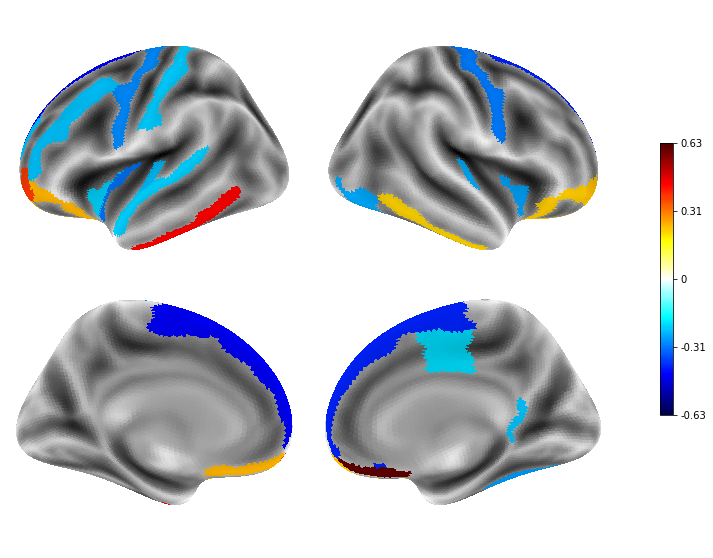

In [3]:
# Initialize a surface reference that we will use
# to extract hemisphere plotting values, we must supply the name
# of the parcellation here.
surf_ref = SurfRef(space='fsaverage5', parc='destr', verbose=1)

# Get the values to plot for left and right hemispheres
# Specifying only keys with .destrieux_g. 
to_plot = surf_ref.get_hemis_plot_vals(rois, i_keys=['.destrieux_g.'])

# Plot  just cortical
plot(to_plot)

Next, let's extract just the subcortical features

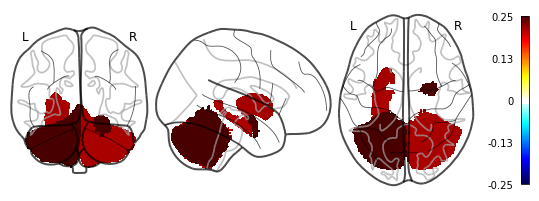

In [4]:
# Similar to surface ref, we specify a volume reference, and extract the values needed
vol_ref = VolRef(space='mni_1mm', parc='aseg')
vol = vol_ref.get_plot_vals(rois, i_keys=['.aseg_'])

# Plot just the volume
plot(vol, threshold=.01)

What if we want to plot them together?

In [5]:
# Add vol info to to_plot dict
to_plot['vol'] = vol
list(to_plot)

['lh', 'rh', 'vol']

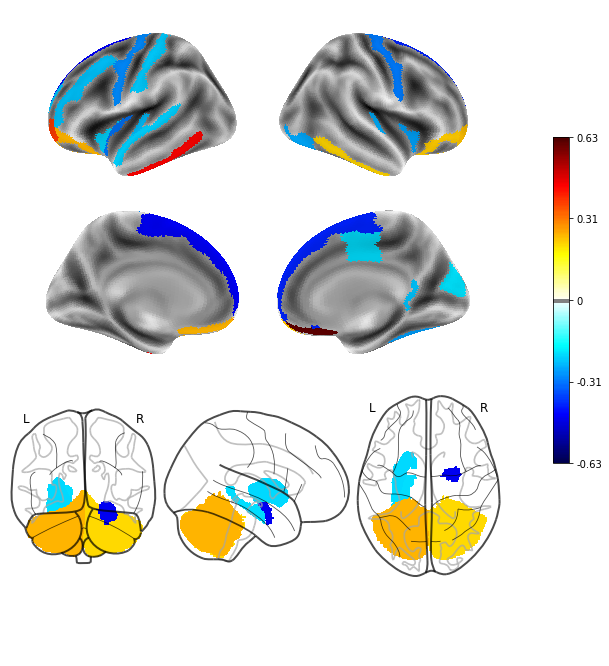

In [6]:
# And use magic plot function
plot(to_plot, threshold=.01)